In [1]:
print('''Let's look at our workflow.

1. Importing Data and the Libraries to Work With
2. Cleaning the Data
3. Data Exploration and Feature Engineering
4. Doing our first round models
5. Bagging various models''')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_explore = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
full = pd.concat([train_explore.drop('Survived',axis=1),test])

In [6]:
full.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Time to see how complete the data set is
full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [8]:
full.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
full['Age'].isna().sum()

263

In [10]:
cols = list(full.columns)
for x in cols:
    num_null = full[x].isna().sum()
    perc_null = round((num_null /len(full)) * 100, 1)
    print(f'{perc_null}% of the {x} missing.')

0.0% of the PassengerId missing.
0.0% of the Pclass missing.
0.0% of the Name missing.
0.0% of the Sex missing.
20.1% of the Age missing.
0.0% of the SibSp missing.
0.0% of the Parch missing.
0.0% of the Ticket missing.
0.1% of the Fare missing.
77.5% of the Cabin missing.
0.2% of the Embarked missing.


C:\Users\myate\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\myate\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 34.,  22.,  16.,  14.,  13.,  35.,  62.,  94., 118.,  66.,  95.,
         89.,  43.,  65.,  53.,  32.,  40.,  36.,  24.,  18.,  23.,  11.,
         16.,  14.,   4.,   1.,   5.,   1.,   1.,   1.]),
 array([ 0.17 ,  2.831,  5.492,  8.153, 10.814, 13.475, 16.136, 18.797,
        21.458, 24.119, 26.78 , 29.441, 32.102, 34.763, 37.424, 40.085,
        42.746, 45.407, 48.068, 50.729, 53.39 , 56.051, 58.712, 61.373,
        64.034, 66.695, 69.356, 72.017, 74.678, 77.339, 80.   ]),
 <a list of 30 Patch objects>)

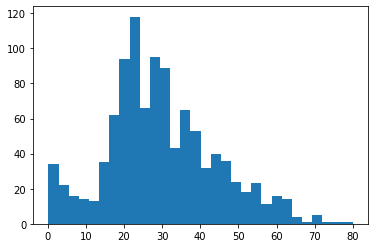

In [11]:
plt.hist(x=full['Age'], bins = 30)

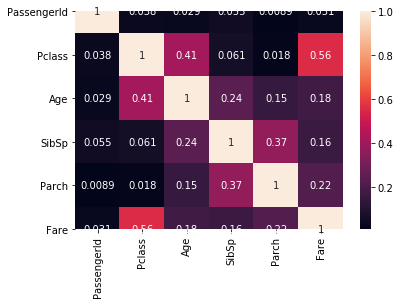

In [12]:
sns.heatmap(abs(full.corr()), annot = True)

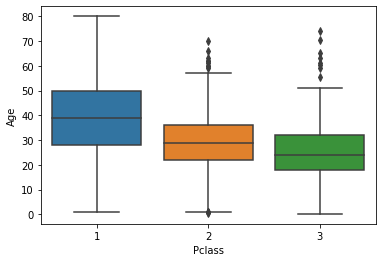

In [13]:
#We can see that age has a strong correlation with Pclass, so we can try to use this to impute the missing age values
sns.boxplot(x=full['Pclass'],y=full['Age'])

In [14]:
for x in range (1,4):
    print(f'The median age for Passenger Class {x} is: ', full[full['Pclass']==x]['Age'].median())

The median age for Passenger Class 1 is:  39.0
The median age for Passenger Class 2 is:  29.0
The median age for Passenger Class 3 is:  24.0


In [15]:
#time to impute into the columns
full.groupby('Pclass')['Age'].median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [16]:
def impute_age(x):
    pass_class = x[0]
    age = x[1]
    if pd.isnull(age):
        if pass_class == 1:
            return 39
        elif pass_class == 2:
            return 29
        else:
            return 24
    else:
         return age         

In [17]:
full['Age'] = full[['Pclass','Age']].apply(impute_age, axis=1)

In [18]:
full['Age'].isna().sum()

0

In [19]:
#Time to take care of the missing fair and embarked columns. We could do the same for correlations on dummies to est. but lazy
full['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [20]:
full['Embarked'] = full['Embarked'].fillna('S')

In [21]:
full['Embarked'].value_counts()

S    916
C    270
Q    123
Name: Embarked, dtype: int64

In [22]:
full[full['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [23]:
full['Fare'] = full['Fare'].fillna(lambda x: x[x['Pclass']==3]['Fare'].median())

In [24]:
full[full['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [25]:
#Okay, now that we have filled in the missing values, we can return to using only the training set. However, need to use these
#transformations on the training set as well

In [26]:
#Okay, now that we have filled in the missing values, we can return to using only the training set. 
train_explore['Age'] = train_explore[['Pclass','Age']].apply(impute_age, axis=1)
train_explore['Embarked'] = train_explore['Embarked'].fillna('S')
train_explore['Fare'] = train_explore['Fare'].fillna(lambda x: x[full['Pclass']==3]['Fare'].median())

test['Age'] = test[['Pclass','Age']].apply(impute_age, axis=1)
test['Embarked'] = test['Embarked'].fillna('S')
test['Fare'] = test['Fare'].fillna(lambda x: x[full['Pclass']==3]['Fare'].median())

In [27]:
train_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [28]:
train_explore.drop('Cabin', axis=1)
test.drop('Cabin', axis = 1)
print('Successfully dropped Cabin column.')

Successfully dropped Cabin column.


In [29]:
#Okay, now we can go on to part 3. It's time for data exploration and feature engineering.

(array([ 54.,  46., 313., 180., 148.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

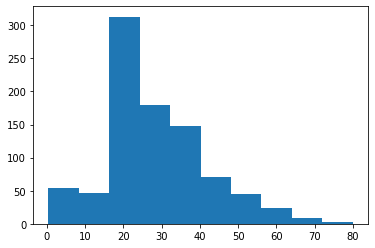

In [30]:
plt.hist(x=train_explore['Age'])

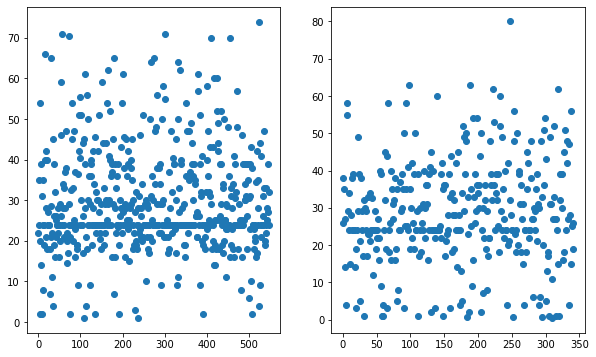

In [31]:
fix, axs = plt.subplots(ncols=2, figsize = (10,6))
axs[0].scatter(x=range(len(list(train_explore['Age'][train_explore['Survived']==0]))), y = train_explore['Age'][train_explore['Survived']==0])
axs[1].scatter(x=range(len(list(train_explore['Age'][train_explore['Survived']==1]))), y = train_explore['Age'][train_explore['Survived']==1])

In [32]:
# They appear to have some differences, however, since they are of difference sizes it is hard to tell. Let's bucketize the age
# ranges and then compare how the age ranges differ by percentage who survived.

age_bucket = train_explore.groupby(pd.cut(train_explore['Age'],bins = [0,10,20,30,40,50,60,70,81]))
age_bucket_pct = (age_bucket.sum()['Survived']/age_bucket.size()*100)
print(age_bucket_pct)

Age
(0, 10]     59.375000
(10, 20]    38.260870
(20, 30]    32.360743
(30, 40]    44.864865
(40, 50]    38.372093
(50, 60]    40.476190
(60, 70]    23.529412
(70, 81]    20.000000
dtype: float64


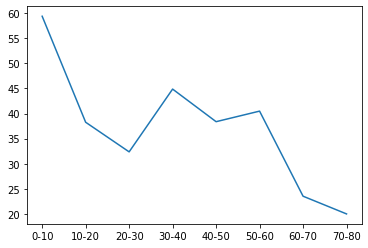

In [33]:
x=[str(i)+"-"+str(i+10) for i in range(0,80,10)]
plt.plot(x, age_bucket_pct.values)

In [34]:
# Although it's still noisey, it appears that there are some differences here that are non-linear so we'll bucketize these
# Might be worth noting that our imputed values for age could have skewed this diagram. Overall could show a negative trend
# with noise, so will test a linear version of age later.

train_explore['Age'] = pd.cut(train_explore['Age'],bins = [0,10,20,30,40,50,60,70,81])

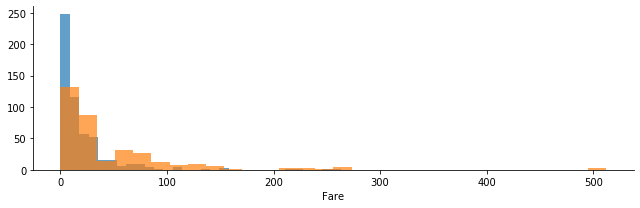

In [35]:
g = sns.FacetGrid(train_explore, hue = 'Survived', aspect = 3)
g.map(plt.hist, 'Fare', alpha = .7, bins = 30)

In [36]:
train_explore.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,"(20, 30]",1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(30, 40]",1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,"(20, 30]",0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(30, 40]",1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,"(30, 40]",0,0,373450,8.0500,NaN,S


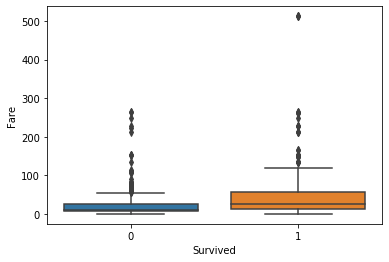

In [37]:
sns.boxplot(x='Survived',y='Fare', data = train_explore)

In [38]:
# does appear to be some differences but overall there appears to be a large amount of outliers and heavy skew. We will
# bucketize to reduce this skew

for x in range(0,2):
    print(train_explore[train_explore['Survived']==x]['Fare'].describe())

count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


In [39]:
#Played around with the bucket values, these seem to correspond best with the quartiles and separating the ticket prices for
# survival rate using information from describe and the boxplots.

fare_buck = train_explore.groupby(pd.cut(train_explore['Fare'], bins=[0,7,9,15,75,513]))
fare_buck_pct = round((fare_buck.sum()['Survived']/fare_buck.size()*100),2)
print(fare_buck_pct)

Fare
(0, 7]        7.69
(7, 9]       21.05
(9, 15]      35.86
(15, 75]     45.83
(75, 513]    76.29
dtype: float64


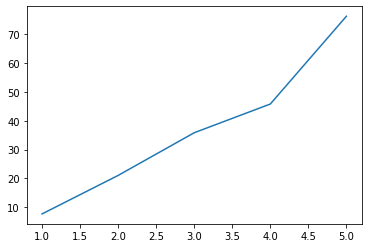

In [40]:
#Relationship looks either linear or slightly exponential, but with a kink. Will keep bucketized to keep it simple
plt.plot(range(1,6), fare_buck_pct.values)

In [41]:
train_explore['Fare'] = pd.cut(train_explore['Fare'], bins=[0,7,9,15,75,513])

In [42]:
train_explore.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,"(20, 30]",1,0,A/5 21171,"(7, 9]",NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(30, 40]",1,0,PC 17599,"(15, 75]",C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,"(20, 30]",0,0,STON/O2. 3101282,"(7, 9]",NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(30, 40]",1,0,113803,"(15, 75]",C123,S
4,5,0,3,"Allen, Mr. William Henry",male,"(30, 40]",0,0,373450,"(7, 9]",NaN,S


In [43]:
pclass_pct = round(train_explore.groupby('Pclass').sum()['Survived']/train_explore.groupby('Pclass').count()['PassengerId']*100,2)
print(pclass_pct)

Pclass
1    62.96
2    47.28
3    24.24
dtype: float64


In [44]:
pclass_pct = round(train_explore.groupby('Sex').sum()['Survived']/train_explore.groupby('Sex').count()['PassengerId']*100,2)
print(pclass_pct)

Sex
female    74.20
male      18.89
dtype: float64


In [45]:
train_explore.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

In [46]:
train_explore.groupby(['Sex','Pclass']).count()['PassengerId'].unstack()

Pclass,1,2,3
Sex,,,
female,94,76,144
male,122,108,347


In [47]:
pclass_pct = round(train_explore.groupby(['Sex','Pclass']).sum()['Survived']/train_explore.groupby(['Sex','Pclass']).count()['PassengerId']*100,2)
print(pclass_pct.unstack())

Pclass      1      2      3
Sex                        
female  96.81  92.11  50.00
male    36.89  15.74  13.54


In [48]:
#We can see some evidence of gender differences, especially by class. Will categorize and then make an interaction variable
# Thus will need to categorize pclass to capture the unique relationships, will do this once we make all the dummy variables

gender_map = {'female': 0, 'male': 1}
train_explore['Sex'] = train_explore['Sex'].map(gender_map).astype(int)

In [49]:
train_explore.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,"(20, 30]",1,0,A/5 21171,"(7, 9]",NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,"(30, 40]",1,0,PC 17599,"(15, 75]",C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,"(20, 30]",0,0,STON/O2. 3101282,"(7, 9]",NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,"(30, 40]",1,0,113803,"(15, 75]",C123,S
4,5,0,3,"Allen, Mr. William Henry",1,"(30, 40]",0,0,373450,"(7, 9]",NaN,S


In [50]:
train_explore['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [51]:
train_explore['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [52]:
# We know that SibSP and Parch are the amount of siblings/spouse and the other people traveling within a group. So let's combine
# them and see if there's a correlation between group size and survival
train_explore['Group Size'] = 1 + train_explore['SibSp'] + train_explore['Parch']
train_explore['Group Size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Group Size, dtype: int64

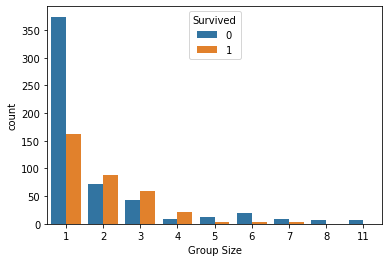

In [53]:
sns.countplot(train_explore['Group Size'], hue = train_explore['Survived'])

In [54]:
# Looking at this, it appears groups of 1, [2,3,4], >4 show similar trends so we will bucket by these values
train_explore['Group Size'] = train_explore['Group Size'].map({1: 'Alone', 2: 'Normal', 3: 'Normal', 4: 'Normal', 5: 'Large', 6: 'Large', 7:'Large', 8: 'Large', 11: 'Large'})

In [55]:
train_explore['Group Size'].value_counts()

Alone     537
Normal    292
Large      62
Name: Group Size, dtype: int64

In [56]:
#Now to look at the names columns to see if titles have any effect on end results
train_explore['Name'].head(20)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [57]:
def title_split(name):
    return name.split(', ')[1].split('.')[0]

In [58]:
train_explore['Title'] = train_explore['Name'].apply(title_split)

In [59]:
train_explore['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Mlle              2
Col               2
Mme               1
Don               1
Ms                1
Jonkheer          1
Lady              1
the Countess      1
Sir               1
Capt              1
Name: Title, dtype: int64

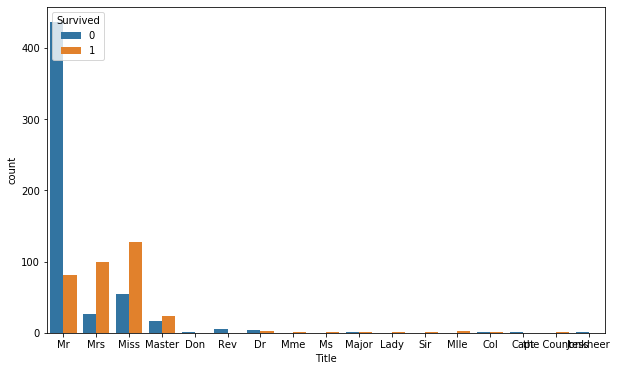

In [60]:
plt.figure(figsize = (10,6))
sns.countplot(x=train_explore['Title'], hue = train_explore['Survived'])

In [61]:
title_pct = round((train_explore.groupby('Title').sum()['Survived']/train_explore.groupby('Title').count()['PassengerId']*100),2)
print(title_pct)

Title
Capt              0.00
Col              50.00
Don               0.00
Dr               42.86
Jonkheer          0.00
Lady            100.00
Major            50.00
Master           57.50
Miss             69.78
Mlle            100.00
Mme             100.00
Mr               15.67
Mrs              79.20
Ms              100.00
Rev               0.00
Sir             100.00
the Countess    100.00
dtype: float64


In [62]:
#Ms Miss Mme Mlle are all the same title, just different spellings/language. Then we'll group by occurences
train_explore['Title'] = train_explore['Title'].replace(['Miss','Ms','Mrs','Mlle','Mme'], 'Ms/Mrs')
train_explore['Title'] = train_explore['Title'].replace(['Dr', 'Master'], 'Dr/Master')
train_explore['Title'] = train_explore['Title'].replace(['Capt','Col','Don','Jonkheer','Lady','Major','Rev','Sir','the Countess'], 'Rare')

In [63]:
train_explore['Title'].value_counts()

Mr           517
Ms/Mrs       311
Dr/Master     47
Rare          16
Name: Title, dtype: int64

In [64]:
train_explore.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,"(20, 30]",1,0,A/5 21171,"(7, 9]",NaN,S,Normal,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,"(30, 40]",1,0,PC 17599,"(15, 75]",C85,C,Normal,Ms/Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,"(20, 30]",0,0,STON/O2. 3101282,"(7, 9]",NaN,S,Alone,Ms/Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,"(30, 40]",1,0,113803,"(15, 75]",C123,S,Normal,Ms/Mrs
4,5,0,3,"Allen, Mr. William Henry",1,"(30, 40]",0,0,373450,"(7, 9]",NaN,S,Alone,Mr


In [65]:
#Now that we've transformed our variables, let's dummy then. Then we'll create the Pclass/Sex interaction term
# First let's drop some columns we don't need
# Next time, don't add inplace when creating new df
train_x = train_explore.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'], axis=1)

In [66]:
train_explore.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Group Size,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,"(20, 30]",1,0,A/5 21171,"(7, 9]",NaN,S,Normal,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,"(30, 40]",1,0,PC 17599,"(15, 75]",C85,C,Normal,Ms/Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,"(20, 30]",0,0,STON/O2. 3101282,"(7, 9]",NaN,S,Alone,Ms/Mrs
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,"(30, 40]",1,0,113803,"(15, 75]",C123,S,Normal,Ms/Mrs
4,5,0,3,"Allen, Mr. William Henry",1,"(30, 40]",0,0,373450,"(7, 9]",NaN,S,Alone,Mr


In [67]:
df = pd.get_dummies(train_explore, drop_first=True)

In [68]:
df['Pclass'] = df['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})
df.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel","Name_Abelson, Mrs. Samuel (Hannah Wizosky)",...,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S,Group Size_Large,Group Size_Normal,Title_Mr,Title_Ms/Mrs,Title_Rare
0,1,0,Third,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
1,2,1,First,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,3,1,Third,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,4,1,First,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
4,5,0,Third,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [69]:
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Columns: 1741 entries, PassengerId to Pclass_Third
dtypes: int32(1), int64(4), uint8(1736)
memory usage: 1.5 MB


In [70]:
#Create interaction terms
df['Second_Sex'] = df['Pclass_Second']*df['Sex']
df['Third_Sex'] = df['Pclass_Third']*df['Sex']

In [71]:
#Have to look back to figure out interaction term with the dropped first. Can't remember if the interaction term is now
#inherently part of the model
#Either way, time to start classification
#Part 4

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
#Normally would need to scale our variables, but since we converted everything to categorical, we no longer need to

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived', axis=1), df['Survived'], test_size=0.33, random_state=42)

In [76]:
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

C:\Users\myate\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [77]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[157  18]
 [ 42  78]]


              precision    recall  f1-score   support

           0       0.79      0.90      0.84       175
           1       0.81      0.65      0.72       120

    accuracy                           0.80       295
   macro avg       0.80      0.77      0.78       295
weighted avg       0.80      0.80      0.79       295

